In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check the first few rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Check for missing values
df.isnull().sum()

# If there are missing values, we can either drop or fill them
df = df.dropna()  # For simplicity, let's drop rows with missing values

# Verify that missing values have been handled
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [3]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the new dataset
df.head()


,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [4]:
# Drop the customerID column (non-essential)
#df = df.drop('customerID', axis=1)

# Optional: Apply PCA for dimensionality reduction if necessary
from sklearn.decomposition import PCA

X = df.drop('Churn_Yes', axis=1)  # Features
y = df['Churn_Yes']  # Target variable

# Standardize the features before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (if needed)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model: Logistic Regression
              precision    recall  f1-score   support

       False       0.86      0.89      0.87      1036
        True       0.65      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409



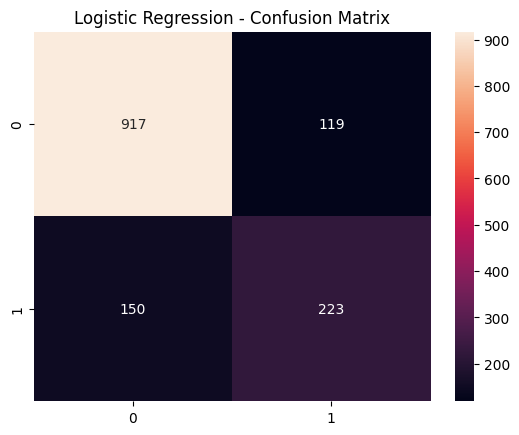

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.82      0.88      0.85      1036
        True       0.59      0.48      0.53       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



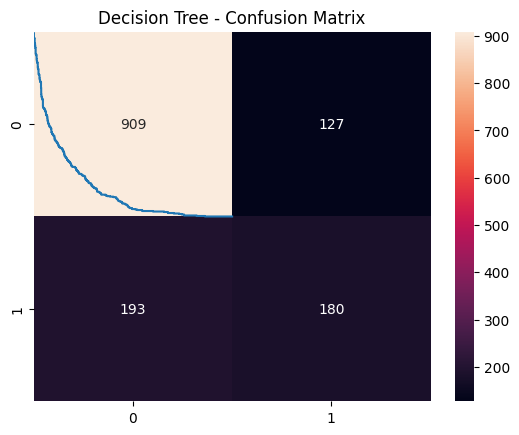

Model: Random Forest
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.69      0.42      0.52       373

    accuracy                           0.80      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.78      0.80      0.78      1409



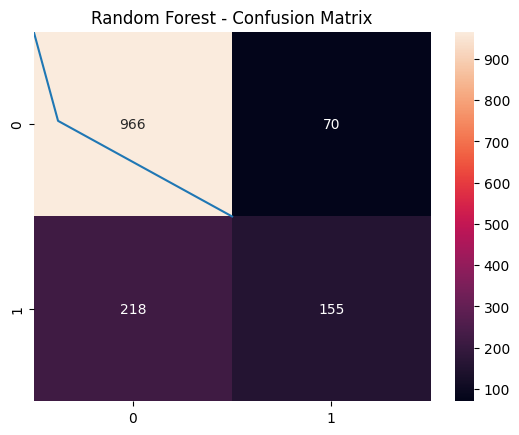

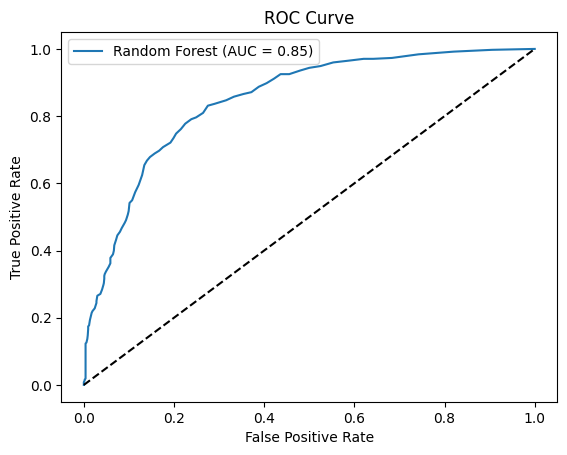

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "model": model,
        "report": classification_report(y_test, y_pred, output_dict=True),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }
for name, result in results.items():
    print(f"Model: {name}")
    print(classification_report(y_test, result["model"].predict(X_test)))
    sns.heatmap(result["conf_matrix"], annot=True, fmt='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    y_score = result["model"].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Retrain models on the resampled data
for name, model in models.items():
    model.fit(X_res, y_res)

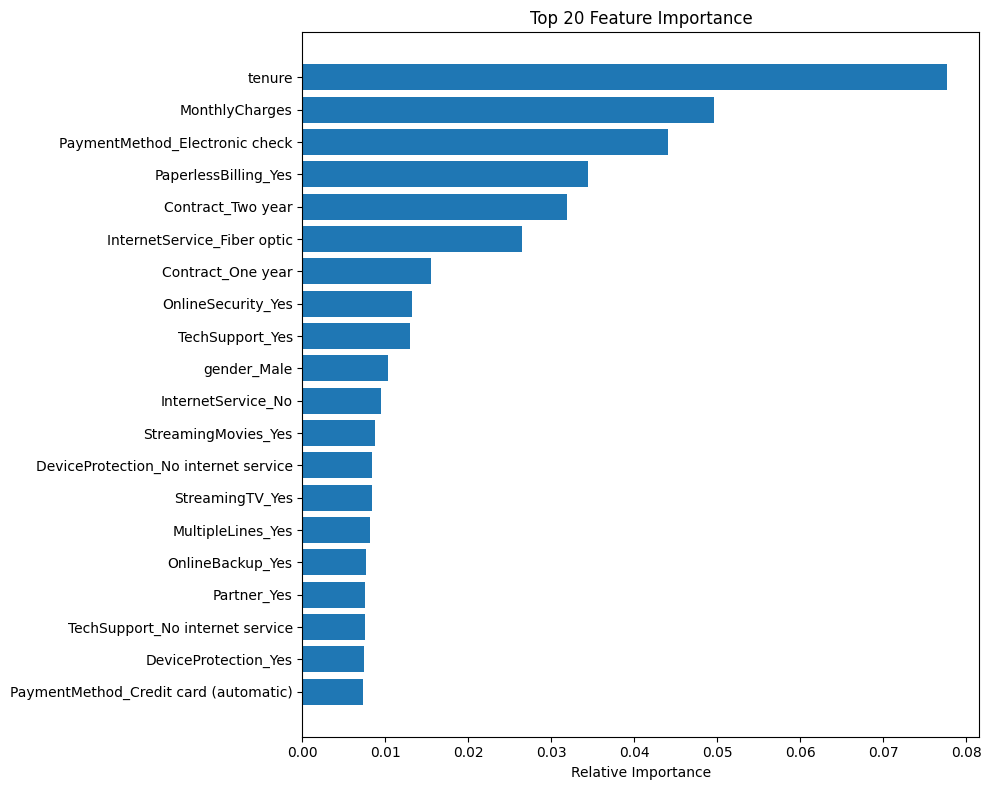

In [19]:
# Get feature importance from Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = importances.argsort()

# Select top N features for plotting
top_n = 20
top_indices = indices[-top_n:]
top_importances = importances[top_indices]
top_feature_names = [X.columns[i] for i in top_indices]


# Plot feature importance
plt.figure(figsize=(10,8))
plt.title("Top 20 Feature Importance")
plt.barh(range(top_n), top_importances, align="center")
plt.yticks(range(top_n), top_feature_names)
plt.xlabel("Relative Importance")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()